<a href="https://colab.research.google.com/github/kevinmcmanus/cas-tau/blob/master/AstropyTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Astropy

Astropy is a collecction of Python libraries for use in Astronomy. Its capabilities are vast.  See these two links for an overview and to get an idea of the capabilities Astropy provides:

[Learn Astropy](http://learn.astropy.org/)

[Astropy Tutorials](http://learn.astropy.org/tutorials.html)

In this tutorial, we'll just scratch surface to give you a hands-on encounter with Astropy. After this tutorial you'll know where to look for more information.

## Basics

To install Astropy on your local machine, execute the following:
```
pip install astropy
```
or if you're using Anaconda to manage your Python environments
```
conda install astropy
```

In the environment provided by Google Colab, astropy is already provided so we don't need to do anything.

The next few sub-sections demonstrate some operations with Constants, Units and Coordinates that the more advanced Astropy modules rely on.

### Constants

Many (most) astronomical calculations involve constants: speed of light, graviational constant, Stefan-Boltzman constant and the like.  Astropy provides many of these, in a module called (what else) `constants`

For a more in-depth discussion of Astropy contants, see: 
[Constants Tutorial](https://docs.astropy.org/en/stable/constants/index.html)

In [4]:
# need the constants module
import astropy.constants as const

In [6]:
# Gravitational constant G
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [7]:
print(const.G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [8]:
#Planck's constant
print (const.h)

  Name   = Planck constant
  Value  = 6.62607015e-34
  Uncertainty  = 0.0
  Unit  = J s
  Reference = CODATA 2018


In [15]:
#speed of light
const.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [16]:
#want it in cgs?
const.c.cgs

<Quantity 2.99792458e+10 cm / s>

In [18]:
#G in cgs
const.G.cgs

<Quantity 6.6743e-08 cm3 / (g s2)>

See [List of Constants](https://docs.astropy.org/en/stable/constants/) for complete list of available constants.

### Units

Units allow us to attach dimensions to scalar and vector quantities. Doing so creates an Astropy `Quantity` object, which among other things allows us to convert among units with relative ease.

In [19]:
#load up the units module
import astropy.units as u

In [20]:
u.watt

Unit("W")

In [21]:
632.3 * u.watt

<Quantity 632.3 W>

In [22]:
type(632.3), type(u.watt), type(632.3*u.watt)

(float, astropy.units.core.Unit, astropy.units.quantity.Quantity)

In [23]:
w = 632.3*u.watt

In [26]:
#what did we get, how to take it apart
type(w), w.value, w.unit

(astropy.units.quantity.Quantity, 632.3, Unit("W"))

### Unit Conversion

We can convert from one set of units to another, say nanometers to Angstroms using the Quantity `to` method, below for the Hydrogen Alpha line at 656.28 nanometers:

In [40]:
# specify the h_alpha line in nanometers
h_alpha =  656.28*u.nm

In [41]:
#convert to angrstrom:
h_alpha.to(u.angstrom)

<Quantity 6562.8 Angstrom>

Divide the h_alpha wavelength: ($\lambda$) into the speed of light to get frequency:
nu = const.c/h_alpha

In [42]:
nu = const.c/h_alpha
nu

<Quantity 456805.72011946 m / (nm s)>

Hmmm, meters per nanometers per second, technically correct, but not very useful. Let's look at this in gigahertz

In [44]:
nu.to(u.gigahertz)

<Quantity 456805.72011946 GHz>

In [46]:
#work with angles:
from astropy.coordinates import Angle

In [35]:
def showdeg(theta:Angle):
  print(f'Theta: {theta.deg} degrees')

In [37]:
showdeg(Angle(60*u.degree))

Theta: 60.0 degrees


In [45]:
#specify the angle in milliarcseconds:
showdeg(Angle(3600*1000*u.mas))

Theta: 1.0000000000000002 degrees


Lots lots lots more at [Units Tutorial](https://docs.astropy.org/en/stable/units/).  Especially see the section [Using Astropy.units](https://docs.astropy.org/en/stable/units/#using-astropy-units). Also take a look at: [Working with Angles](https://docs.astropy.org/en/stable/coordinates/angles.html)


## Coordinates

[Coordinates Class](https://docs.astropy.org/en/stable/coordinates/)


[SkyCoords](https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html)

In [56]:
#more astropy libraries
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord, EarthLocation

In [57]:
pleiades = SkyCoord.from_name('pleiades')

In [58]:
pleiades

<SkyCoord (ICRS): (ra, dec) in deg
    (56.75, 24.11666667)>

In [59]:
#get the right ascension
pleiades.ra

<Longitude 56.75 deg>

Notice that by default, RA comes out in degrees, minutes, seconds. To see H:M:S, convert to string with a format parmeter:

In [60]:
pleiades.ra.to_string(u.hour)

'3h47m00s'

In [61]:
#galactic coordinates
pleiades.galactic

<SkyCoord (Galactic): (l, b) in deg
    (166.57066283, -23.52116779)>

In [62]:
pleiades.distance

<Quantity 1.>

## Catalog Query

### Simbad

### Sloan Digital Sky Survey

## Observation Planning

## Fancy Plot

In [3]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 2.7MB/s 
     |████████████████████████████████| 2.7MB 46.0MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=8872a7f8d48cb8d353b4e180cefe31190f5c558b21c225cf669bcbc591cc4cf6
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


## Construct HR-Diagram for the Pleiades with Gaia Data

A first approximation to obtaining the members of the Pleiades open cluster is to execute a cone search of the Gaia Archive using astrometrics from Simbad.
In the case fo the Pleiades, these are:
```
ra = 56.75 degree
dec = 24.1167 degree
parallax = 7.364 mas
pmra = 19.997 mas/year
pmdec = -45.548 mas/year
```

In [47]:
from astroquery.gaia import Gaia

# construct ADL query using astrometrics from above, add some obs quality constraints
job3 = Gaia.launch_job("SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax \
    FROM gaiadr2.gaia_source \
    WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 \
    AND abs(pmra_error/pmra)<0.10 \
    AND abs(pmdec_error/pmdec)<0.10 \
    AND pmra IS NOT NULL AND abs(pmra)>0 \
    AND pmdec IS NOT NULL AND abs(pmdec)>0 \
    AND pmra BETWEEN 15 AND 25 \
    AND pmdec BETWEEN -55 AND -40;")
pleiades_table = job3.get_results()

In [48]:
pleiades_table

source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax
,deg,deg,mag,mag,mag,mas
int64,float64,float64,float32,float32,float32,float64
65693075278791552,58.45209641024671,23.485778193170404,15.684173,16.8151,14.622672,3.4866299261260667
65674039981117056,57.937676685851116,23.279746731942588,20.107876,20.954243,18.825369,2.406580185988847
65607760048708608,58.10969274598988,23.06037344119279,20.119907,20.536541,18.868631,0.31213309023545693
69877988331531904,55.930095532879015,25.0805015068784,7.4981666,7.581719,7.3928056,8.027063450746246
68585851713901952,55.461602524301505,25.27623121881423,19.361774,21.501656,18.033218,4.548594558832415
64933621980897536,57.17084229066591,23.237979114981755,16.102013,17.91502,14.798337,8.509836138095356
66816187748666624,56.99900482385139,24.731092856679197,12.923352,13.676245,12.085092,6.493298083217951
64884208379713152,57.01650068097936,22.876860506461384,20.06,20.551508,19.022774,0.30017444741805516


In [51]:
from astropy.coordinates import Distance
# get distance from parallax
distance = Distance(parallax=Quantity(pleiades_table['parallax']))

In [52]:
#absolute magnitude is the apparent magnitude (phot_g_mean_mag) scaled up to a standard distance of 10pc.  distmod does this
abs_mag=pleiades_table['phot_g_mean_mag'] - distance.distmod
star_color = pleiades_table['phot_bp_mean_mag'] - pleiades_table['phot_rp_mean_mag']

Text(0, 0.5, 'Absolute Magnitude: $m_g - distmod$')

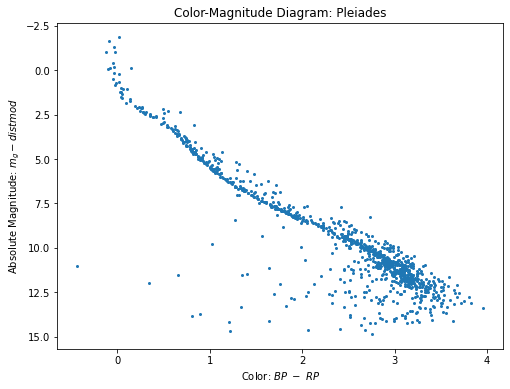

In [53]:
#ready to plot!
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(star_color, abs_mag, s=4)
ax.invert_yaxis()

ax.set_title('Color-Magnitude Diagram: Pleiades')
ax.set_xlabel(r'Color: $BP\ - \ RP$')
ax.set_ylabel(r'Absolute Magnitude: $m_g - distmod$')

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.colors as colors
%matplotlib inline

## Galactic Hydrogen Plot

In [5]:
from astropy.coordinates import Angle
import astropy.units as u
from astroquery.simbad import Simbad
import astropy.coordinates as coord
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.table import QTable, Table, vstack
from astropy.units import Quantity

Data from the [HI4PI: A full-sky HI survey based on EBHIS and GASS](https://arxiv.org/abs/1610.06175)

Data File format:
```
Byte-by-byte Description of file: nhi_hpx.dat
--------------------------------------------------------------------------------
   Bytes Format  Units   Label     Explanations
--------------------------------------------------------------------------------
   1-  8  I8     ---     HPX       HPX index (HPXINDEX)
  10- 18  F9.5   deg     RAdeg     Right ascension (J2000)
  20- 28  F9.5   deg     DEdeg     Declination (J2000)
  30- 38  F9.5   deg     GLON      Galactic longitude (J2000)
  40- 48  F9.5   deg     GLAT      Galactic latitude (J2000)
  50- 71  E22.15 cm-2    NHI       HI column density
--------------------------------------------------------------------------------
```

In [6]:
url = 'https://cdsarc.unistra.fr/ftp/J/A+A/594/A116/nhi_hpx.dat.gz'
cols = ['HPX', 'RAdeg','DEdeg','GLON','GLAT', 'NHI']

hi4pi = pd.read_csv(url, delim_whitespace=True, names=cols, header=None)

In [7]:
hi4pi.head()

,HPX,RAdeg,DEdeg,GLON,GLAT,NHI
0,0,192.90971,27.13788,45.0,89.95431,9.174280e+19
1,1,192.84877,27.17301,135.0,89.95431,9.244184e+19
2,2,192.80931,27.11878,225.0,89.95431,9.394214e+19
3,3,192.87024,27.08366,315.0,89.95431,9.281170e+19
4,4,192.96046,27.11176,22.5,89.90863,9.085496e+19


In [8]:
print(f'hi4pi has {len(hi4pi)} records')

hi4pi has 12582912 records


In [ ]:
#don't run this code -- takes 20 minutes
#fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111)
#ax.scatter(hi4pi.RAdeg, hi4pi.DEdeg, c=hi4pi.NHI, cmap='gnuplot')
#ax.invert_xaxis()

In [9]:
#crunch the data array to something that will plot faster

#round to 1/10 degree precision
hi4pi['RAdeg1'] = np.round(hi4pi.RAdeg,1)
hi4pi['DEdeg1'] = np.round(hi4pi.DEdeg, 1)
hi4pi['GLAT1'] = np.round(hi4pi.GLAT,1)
hi4pi['GLON1'] = np.round(hi4pi.GLON,1)

In [10]:
#get the mean NHI value at the new precision level, rename the columns to good ol' ra and dec

#equatorial coords
hi4pi_eq = hi4pi[['RAdeg1', 'DEdeg1', 'NHI']].groupby(['RAdeg1','DEdeg1']).mean().reset_index()
hi4pi_eq.rename(columns={"RAdeg1":"ra", "DEdeg1":"dec"}, inplace=True)

#galactic coords
hi4pi_gal = hi4pi[['GLON1', 'GLAT1', 'NHI']].groupby(['GLON1','GLAT1']).mean().reset_index()
hi4pi_gal.rename(columns={"GLON1":"l", "GLAT1":"b"}, inplace=True)

In [11]:
#convert everybody to angles and wrap the longitude
hi4pi_eq.ra = Angle(np.array(hi4pi_eq.ra)*u.degree).wrap_at(180*u.degree)
hi4pi_eq.dec = Angle(np.array(hi4pi_eq.dec)*u.degree)

hi4pi_gal.l = Angle(np.array(hi4pi_gal.l)*u.degree).wrap_at(180*u.degree)
hi4pi_gal.b = Angle(np.array(hi4pi_gal.b)*u.degree)

In [12]:
#create the image arrays
#note declination and lattitude in 'x' (row) positions and ra and longitude in 'y' (column) positions
image_eq = pd.pivot_table(hi4pi_eq,index='dec',columns='ra', values='NHI',aggfunc=np.mean).to_numpy( copy=True)

image_gal = pd.pivot_table(hi4pi_gal,index='b',columns='l', values='NHI',aggfunc=np.mean).to_numpy( copy=True)
image_eq.shape, image_gal.shape

((1801, 3600), (1801, 3600))

In [13]:
ra_vec = Angle(np.linspace(hi4pi_eq.ra.min(), hi4pi_eq.ra.max(), image_eq.shape[1], endpoint=False)*u.degree)
dec_vec= Angle(np.linspace(hi4pi_eq.dec.min(), hi4pi_eq.dec.max(), image_eq.shape[0], endpoint=False)*u.degree)

l_vec = Angle(np.linspace(hi4pi_gal.l.min(), hi4pi_gal.l.max(), image_gal.shape[1], endpoint=False)*u.degree)
b_vec = Angle(np.linspace(hi4pi_gal.b.min(), hi4pi_gal.b.max(), image_gal.shape[0], endpoint=False)*u.degree)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


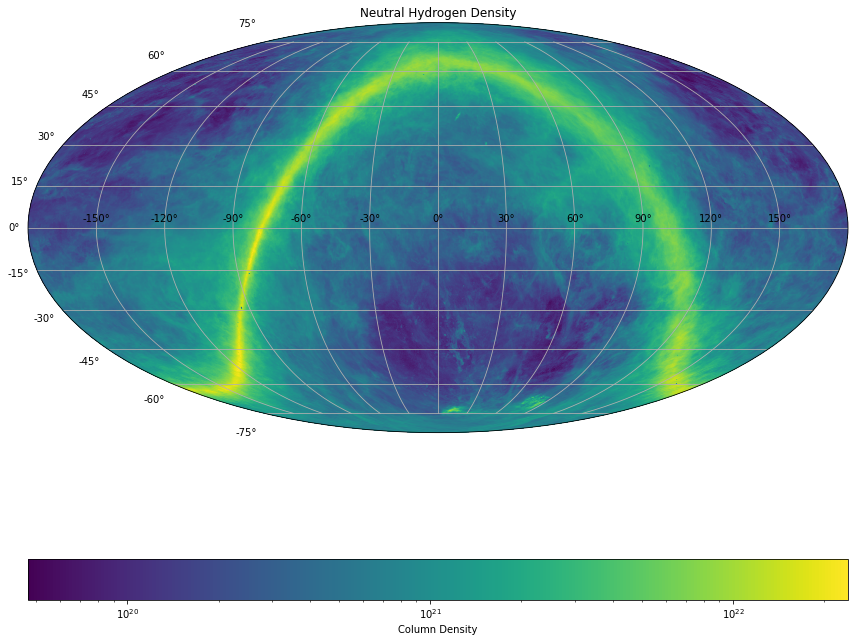

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# plot in equatorial coordinates

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='mollweide')
pcm = ax.pcolormesh(ra_vec.radian,
           dec_vec.radian,
           image_eq,
           cmap='viridis', norm=colors.LogNorm())
ax.grid()
ax.set_title('Neutral Hydrogen Density\nEquatorial Coordinates')

plt.colorbar(pcm, orientation='horizontal',label='Column Density')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


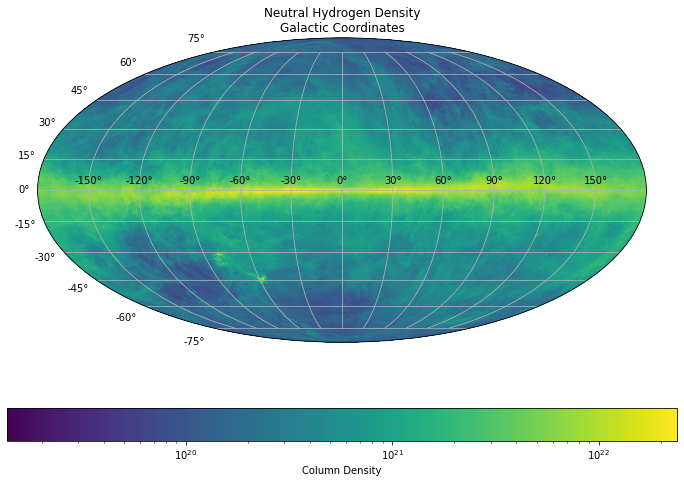

In [21]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='mollweide')
pcm=ax.pcolormesh(l_vec.radian,
           b_vec.radian,
           image_gal,
           cmap='viridis', norm=colors.LogNorm())
ax.grid()
ax.set_title('Neutral Hydrogen Density\nGalactic Coordinates')

plt.colorbar(pcm, orientation='horizontal',label='Column Density')


In [ ]:
clusters = ['Blanco 1',
 'Collinder 140',
 'Coma Berenices Cluster',
 'Hyades',
 'Pleiades',
 'Praesepe',
 'alpha Per']

In [ ]:
# set up the Simbad query
from astroquery.simbad import Simbad
from astropy.time import Time
mySimbad = Simbad()
mySimbad.add_votable_fields('parallax', 'pm','velocity','typed_id')
mySimbad.get_votable_fields()


In [ ]:
#from astropy.table import Table, vstack
res_table = vstack([mySimbad.query_object(c) for c in clusters],join_type='exact')

In [ ]:
def fix_table(res_table):
  cluster_info=Table(res_table['TYPED_ID', 'PLX_VALUE', 'PLX_PREC','RA', 'RA_PREC', 'DEC', 'DEC_PREC',
                              'PMRA', 'PMDEC', 'RVZ_RADVEL', 'RVZ_ERROR'])

  #gotta be a better way to do this:
  cluster_info['TYPED_ID'] = [c.decode('utf-8') for c in cluster_info['TYPED_ID']]

  #rename the columns to look like Gaia
  cluster_info.rename_column('TYPED_ID','cluster')
  cluster_info.rename_column('PLX_VALUE','parallax')
  cluster_info.rename_column('PLX_PREC', 'parallax_error')
  cluster_info.rename_column('RA', 'ra')
  cluster_info.rename_column('RA_PREC','ra_error')
  cluster_info.rename_column('DEC', 'dec')
  cluster_info.rename_column('DEC_PREC','dec_error')
  cluster_info.rename_column('PMRA', 'pmra')
  cluster_info.rename_column('PMDEC', 'pmdec')
  cluster_info.rename_column('RVZ_RADVEL','radial_velocity')
  cluster_info.rename_column('RVZ_ERROR', 'rv_error')

  #unmask the columns
  cluster_info = cluster_info.filled() 


  #index on the cluster name
  cluster_info.add_index('cluster')

  # coordinates,  note the update to J2015.5 to match with Gaia
  cluster_info['coords'] = \
      SkyCoord(ra = cluster_info['ra'],
          dec = cluster_info['dec'], unit = (u.hour, u.deg),
          obstime = 'J2000',  #simbad returns J2000 coords
          distance = coord.Distance(parallax=Quantity(cluster_info['parallax'])),
          pm_ra_cosdec = cluster_info['pmra'],
          pm_dec = cluster_info['pmdec'],
          radial_velocity = cluster_info['radial_velocity']).apply_space_motion(new_obstime=Time('2015.5',format='decimalyear'))

  return cluster_info

In [ ]:
open_cluster_info=fix_table(res_table)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='mollweide')
ax.pcolormesh(l_vec.radian,
           b_vec.radian,
           image_gal,
           cmap='viridis', norm=colors.LogNorm())

# plot the clusters
color=iter(plt.cm.rainbow(np.linspace(0,1,len(clusters))))
for c in clusters:
  ax.scatter(open_cluster_info.loc[c]['coords'].galactic.l.wrap_at(180*u.deg).radian, open_cluster_info.loc[c]['coords'].galactic.b.radian, 
    color=next(color), s=50, label=c)
ax.grid()
ax.legend(loc='upper right')

In [ ]:
glob_clusters=['NGC0104', 'NGC0288', 'NGC0362', 'NGC1851', 'NGC5272', 'NGC5904',
       'NGC6205', 'NGC6218', 'NGC6341', 'NGC6397', 'NGC6656', 'NGC6752',
       'NGC6809', 'NGC7099']

In [ ]:
#from astropy.table import Table, vstack
res_table = vstack([mySimbad.query_object(c) for c in glob_clusters],join_type='exact')

In [ ]:
glob_cluster_info = fix_table(res_table)

In [ ]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
fig = plt.figure(figsize=(16,12))

#gs1 = gridspec.GridSpec(1, 2, width_ratios=(1,9))

#main plot axis
#ax = plt.subplot(gs1[0,1], projection='mollweide')
ax = fig.add_subplot(111, projection='mollweide')
pcm = ax.pcolormesh(l_vec.radian,
           b_vec.radian,
           image_gal,
           cmap='Greys', norm=colors.LogNorm(),alpha=0.3)

# plot the clusters
color=iter(plt.cm.tab20(np.linspace(0,1,20)))
for c in clusters:
  ax.scatter(open_cluster_info.loc[c]['coords'].galactic.l.wrap_at(180*u.deg).radian, open_cluster_info.loc[c]['coords'].galactic.b.radian, 
    marker='P',color=next(color), s=200, label=c, alpha=1.0)
  
# plot the globs
color=iter(plt.cm.tab20(np.linspace(0,1,20)))
for c in glob_clusters:
  ax.scatter(glob_cluster_info.loc[c]['coords'].galactic.l.wrap_at(180*u.deg).radian, glob_cluster_info.loc[c]['coords'].galactic.b.radian, 
    marker='X',color=next(color), s=200, label=c, alpha=1.0)
ax.grid()
ax.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0.05)
#ax.legend(loc='upper right')
#ax.invert_xaxis()
ax.tick_params(axis='x', colors='white')
ax.set_xlabel('Galactic Longitude', color='White')
ax.set_ylabel('Galactic Latitude', color='white')
#put the colorbar to the left
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("left", size="5%", pad=0.05)
#cax = plt.subplot(gs1[0,0])
cb = plt.colorbar(pcm, ax=[ax], location="left", shrink=0.5)
cb.ax.set_ylabel('log(NHI)')


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
axp = ax.imshow(np.random.randint(0, 100, (100, 100)))
cb = plt.colorbar(axp,ax=[ax],location='left')
plt.show()

In [ ]:
 = ax.imshow(np.arange(100).reshape((10,10)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)


In [ ]:
fig = plt.figure(figsize=(12,8))

#axis for main plot
ax = fig.add_subplot(111, projection='mollweide')
pcm = ax.pcolormesh(l_vec.radian,
           b_vec.radian,
           image_gal,
           cmap='viridis', norm=colors.LogNorm(),alpha=0.3)

# plot the clusters
color=iter(plt.cm.tab20(np.linspace(0,1,20)))
for c in clusters:
  ax.scatter(open_cluster_info.loc[c]['coords'].galactic.l.wrap_at(180*u.deg).radian, open_cluster_info.loc[c]['coords'].galactic.b.radian, 
    color=next(color), s=100, label=c)
  
# plot the globs
color=iter(plt.cm.tab20(np.linspace(0,1,20)))
for c in glob_clusters:
  ax.scatter(glob_cluster_info.loc[c]['coords'].galactic.l.wrap_at(180*u.deg).radian, glob_cluster_info.loc[c]['coords'].galactic.b.radian, 
    marker='+',color=next(color), s=100, label=c)
ax.grid()
ax.legend(loc='upper right')

cb = fig.colorbar(pcm, ax=ax)
cb.ax.set_ylabel('log(NHI)',rotation=270)
#ax.invert_xaxis()

In [ ]:
# reduce resolution to 3600 x 1800
rastep = 0.1 # tenth degree steps
decstep = 0.1 # tenth degree steps


In [ ]:
hi4pi['RAint'] = (hi4pi.RAdeg//rastep).astype(int)
hi4pi['DEint'] = ((90+hi4pi.DEdeg)//decstep).astype(int)


In [ ]:
hi4pi.head()

In [ ]:
hi4pi_01 = hi4pi[['RAint','DEint','NHI']].groupby(['DEint','RAint']).mean().reset_index()
hi4pi_image = pd.pivot_table(hi4pi_01,index='DEint',columns='RAint', values='NHI',aggfunc=np.mean).to_numpy( copy=True)

In [ ]:
ra_vec = np.linspace(0,360, 3600,  endpoint=False)
dec_vec= np.linspace(-90,90,1800, endpoint=False)

In [ ]:
decdec, rara = np.meshgrid(dec_vec, ra_vec)

In [ ]:
decdec.shape

In [ ]:
xx=np.arange(10)

In [ ]:
xx[:len(xx)-1]

In [ ]:

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.pcolormesh(ra_vec,dec_vec, hi4pi_image, cmap='gnuplot', norm=colors.LogNorm())
ax.invert_xaxis()

In [ ]:
from astropy.coordinates import Angle
import astropy.units as u

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='mollweide')
#ax.pcolormesh(Angle(ra_vec*u.degree).wrap_at(180*u.degree).radian,
#              Angle(dec_vec*u.degree).radian,
#              hi4pi_image, cmap='gnuplot', norm=colors.LogNorm())
ax.scatter(hi4pi1.RAdeg1, hi4pi1.DEdeg1, c=hi4pi1.NHI, cmap='gnuplot', norm=colors.LogNorm())

#ax.invert_xaxis()

In [ ]:
Angle(90*u.degree).wrap_at('180d').radian

In [ ]:
hi4pi1.head()

In [ ]:
#this takes a while too!
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(Angle(np.array(hi4pi1.RAdeg1)*u.degree).wrap_at(180*u.degree).radian,
           Angle(np.array(hi4pi1.DEdeg1)*u.degree).radian,
           c=hi4pi1.NHI, cmap='gnuplot', norm=colors.LogNorm())
#ax.invert_xaxis()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')
arr = np.random.rand(180, 360)

lon = np.linspace(-np.pi, np.pi,360)
lat = np.linspace(-np.pi/2., np.pi/2.,180)
Lon,Lat = np.meshgrid(lon,lat)

im = ax.pcolormesh(Lon,Lat,arr, cmap=plt.cm.jet)

In [ ]:
plt.plot(Angle(ra_vec*u.degree).radian)